<a href="https://www.analytiksinc.com">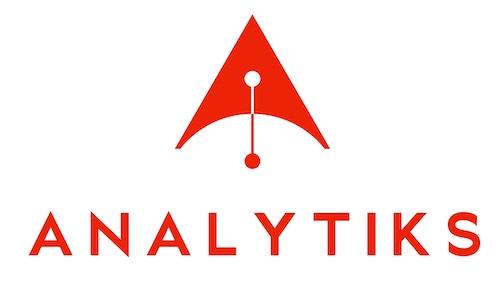</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

## Exercise: Scraping SoundCloud

### <i/> Scrape the top track on SoundCloud currently

#### a. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

#### b. Load the target page using requests

<a href="https://soundcloud.com/charts/top">Target Link</a>

In [2]:
url = "https://soundcloud.com/charts/top"
r = requests.get(url)

#### b. Check if the response is successful.
200 = The resource was accessed successfully

In [3]:
r

<Response [200]>

#### c. Check the contents of the loaded page
<i/> You can use the 'View Source' functionality of your browser for this too

In [4]:
r.content

b'<!DOCTYPE html>\n\n<html lang="en">\n<head>\n  <meta charset="utf-8">\n  <meta name="theme-color" content="#333">\n\n  \n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n  \n  <link rel="dns-prefetch" href="//style.sndcdn.com">\n  <link rel="dns-prefetch" href="//a-v2.sndcdn.com">\n  <link rel="dns-prefetch" href="//api-v2.soundcloud.com">\n  <link rel="dns-prefetch" href="//sb.scorecardresearch.com">\n  <link rel="dns-prefetch" href="//secure.quantserve.com">\n  <link rel="dns-prefetch" href="//eventlogger.soundcloud.com">\n  <link rel="dns-prefetch" href="//api.soundcloud.com">\n  <link rel="dns-prefetch" href="//ssl.google-analytics.com">\n  <link rel="dns-prefetch" href="//i1.sndcdn.com">\n  <link rel="dns-prefetch" href="//i2.sndcdn.com">\n  <link rel="dns-prefetch" href="//i3.sndcdn.com">\n  <link rel="dns-prefetch" href="//i4.sndcdn.com">\n  <link rel="dns-prefetch" href="//wis.sndcdn.com">\n  <link rel="dns-prefetch" href="//va.sndcdn.com">\n  <link rel="dn

#### d. Use beautifulsoup to parse the html data

In [5]:
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="#333" name="theme-color"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="//style.sndcdn.com" rel="dns-prefetch"/>
  <link href="//a-v2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//api-v2.soundcloud.com" rel="dns-prefetch"/>
  <link href="//sb.scorecardresearch.com" rel="dns-prefetch"/>
  <link href="//secure.quantserve.com" rel="dns-prefetch"/>
  <link href="//eventlogger.soundcloud.com" rel="dns-prefetch"/>
  <link href="//api.soundcloud.com" rel="dns-prefetch"/>
  <link href="//ssl.google-analytics.com" rel="dns-prefetch"/>
  <link href="//i1.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i3.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i4.sndcdn.com" rel="dns-prefetch"/>
  <link href="//wis.sndcdn.com" rel="dns-prefetch"/>
  <link href="//va.sndcdn.com" rel="dns-prefetch"/>
  <link href="//pixel.quantserve.

#### e. Using what you know of the contents, use 'Find and FindAll' to get the top track

In [6]:
li = soup.body.find_all('li')
song_names = []

for i in range(len(li)):
    song = li[i].find('article')
    if song != None:
        song_names.append(song.find_all('a'))
        
print("Top track is {} by {}".format(song_names[0][0].text, song_names[0][1].text))

table = pd.DataFrame([[song_names[x][0].text, song_names[x][1].text] for x in range(len(song_names))])
table.columns = ['Name of song', 'Name of artist']
table.set_index(np.arange(1,51))

Top track is 10000 Hours (cover) by JK of BTS by BTS


,Name of song,Name of artist
1,10000 Hours (cover) by JK of BTS,BTS
2,약속 By JIMIN Of BTS,BTS
3,مهرجان هلا والله | علي الرخيصه كلبه الجنيه 2020,Omar Kamal | عمر كمال
4,مهرجان قلبي عايز صرمة - فيلو و مسلم 2020,Muslim | مسلم
5,Wishing Well,Juice WRLD
6,اسر ياسين و نيللى كريم | المدفعجية - مليونير |...,Omar Kamal | عمر كمال
7,Pop Smoke - Mood Swings (feat. Lil Tjay),POP SMOKE
8,مهرجان هضرب عيار علي الجسد | من امتى كان الاسد...,Ahmed Kamel - Ana Rayh | احمد كامل - انا رايح
9,مهرجان حب عمري كيمو كونو ( البشر بنت الحرام ),Muslim | مسلم
10,Wegz & Molotof - Dorak Gai | ويجز - دورك جاى م...,Exclusive Trending Music
